# Exercise 1

Random deposition and diffusion model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [56]:
def deposit_and_diffuse(h):
    L = h.size
    target = np.random.randint(0,L)
    left = target - 1
    right = target + 1
    if right == h.shape[0]:
        right = 0
        
       
    # drop particle
    h[target] += 1
    
    # diffusion 
    # if left and right are the same heigth and are lower than target
    if h[left] == h[right] and h[left] < h[target] + 1:
        h[target] -= 1
        random_number = np.random.rand()
        if random_number < .5:
            h[left] += 1
        else:
            h[right] += 1
        return h
    
    if h[right] < h[target] and h[right] < h[left] + 1:
        h[right] += 1
        h[target] -= 1
        return h
    
    if h[left] < h[target] and h[left] < h[right] + 1:
        h[left] += 1
        h[target] -= 1
    return h

def L_deposits(h):
    for _ in range(h.size):
        h = deposit_and_diffuse(h)
    return h

## 1.1
Draw a single instance growing

I draw it after $L$, $10 L$ and $100 L$ particles deposited and diffused.

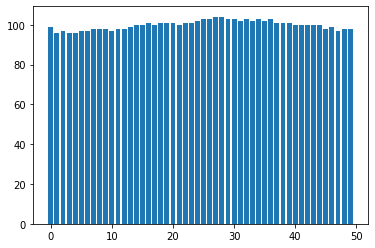

In [57]:
L = 50
h = np.zeros(L)
x = np.arange(L)

for _ in range(L):
    h = deposit_and_diffuse(h)

plt.clf()
plt.bar(x, h)
plt.savefig('build/Ex1-draw-001.pdf')

for _ in range(9 * L):
    h = deposit_and_diffuse(h)

plt.clf()
plt.bar(x, h)
plt.savefig('build/Ex1-draw-010.pdf')

for _ in range(90 * L):
    h = deposit_and_diffuse(h)

plt.clf()
plt.bar(x, h)
plt.savefig('build/Ex1-draw-100.pdf')

## 1.2 Measuring roughness exponent $\alpha$

First we define some finction which come in handy for 1.2 and 1.3, later specific for each part

In [58]:
h = np.zeros(10)

In [59]:
h.shape[0]

10

In [60]:
def width(L,T):
    h = np.zeros(L)
    W = []
    for _ in range(T):
        W.append(np.std(h))
        h = deposit_and_diffuse(h)
    return W, h

def width_multiple(L,T,runs=10):
    W_all = []
    for _ in range(runs):
        W, h = width(L,T)
        W_all.append(W)
    return W_all

def width_average(L,T,runs=10):
    W_all = np.array(width_multiple(L,T,runs))
    W_average = np.average(W_all, axis=0)
    return W_average

def width_largeT_average(L,runs=10):
    W_average = width_average(L,15 * L)
    W_average = W_average[2 * L:]
    average = np.average(W_average)
    return average

In [61]:
# function for the curve fits
def polynomial(x,factor,exponent):
    return factor * x**exponent

In [83]:
L = np.arange(10, 100,3)
W = [width_largeT_average(l) for l in L]

In [81]:
popt, pcov = curve_fit(polynomial, L, W)
error = np.sqrt(np.diag(pcov))
factor, alpha = popt

print(f'alpha = {alpha} +/- {error[1]}')

alpha = 0.18695841233956367 +/- 0.014285333195333799


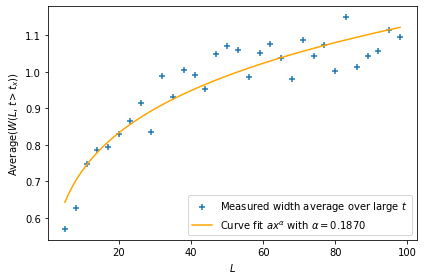

In [82]:
plt.clf()
plt.scatter(L, W,
           marker='+',
           label='Measured width average over large $t$')

L_fine = np.linspace(L[0], L[-1], 1000)
plt.plot(L_fine, polynomial(L_fine, factor, alpha),
        color='orange',
        label=fr'Curve fit $ax^\alpha$ with $\alpha = {alpha:.4f}$')

plt.xlabel(r'$L$')
plt.ylabel(r'Average($W(L,t > t_x)$)')
plt.legend()
plt.tight_layout()
plt.savefig('build/Ex1-alpha.pdf')

## 1.3 Measuring growth exponent $\beta$

First we can look how the width behaves and we can see that it is quite unstable.

Because of that we take the average over many runs and apply a curve fit to it to get $\beta$ assuming that it does not depend on L.

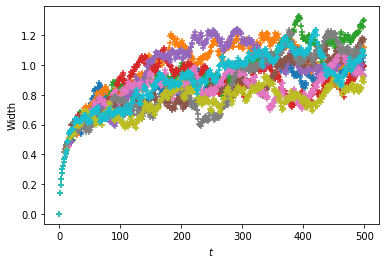

In [53]:
plt.clf()
L = 50
T = 500
t = np.arange(T)
W_all = width_multiple(L,T)
for W in W_all:
    plt.scatter(t,W,
           marker='+')
    plt.xlabel(r'$t$')
    plt.ylabel('Width')
plt.savefig('build/many_widths.pdf')

Here we apply the curve fit to an average over 100 runs. First we used a Length and Time interval of 50 units each. To verify that $\beta$ does not depend on $L$ it is done for $L = T = 100$ afterwards as well where a similar parameter is calculated

In [ ]:
L = 50
T = 50
t = np.arange(T)
W_average = width_average(L,T,runs=100)

In [ ]:
popt, pcov = curve_fit(polynomial, t, W_average)
error = np.sqrt(np.diag(pcov))
factor, beta = popt

print(f'L = T = {L}:\n\tbeta = {beta} +/- {error[1]}')

In [ ]:
plt.clf()
plt.scatter(t,W_average,
       marker='+',
           label='Calculated width')

t_fine = np.linspace(t[0], t[-1],1000)
plt.plot(t_fine,polynomial(t_fine,factor,beta),
         label=fr'Curve fit $ax^\beta$ with $\beta = {beta:.4f}$',
        color='orange')

plt.xlabel(r'$t$')
plt.ylabel('Width')
plt.legend()
plt.tight_layout()
plt.savefig('build/beta_50.pdf')

In [ ]:
L = 100
T = 100
t = np.arange(T)
W_average = width_average(L,T,runs=100)

popt, pcov = curve_fit(polynomial, t, W_average)
error = np.sqrt(np.diag(pcov))
factor, beta = popt

print(f'L = T = {L}:\n\tbeta = {beta} +/- {error[1]}')

plt.clf()
plt.scatter(t,W_average,
       marker='+',
           label='Calculated width')

t_fine = np.linspace(t[0], t[-1],1000)
plt.plot(t_fine,polynomial(t_fine,factor,beta),
         label=fr'Curve fit $ax^\beta$ with $\beta = {beta:.4f}$',
        color='orange')

plt.xlabel(r'$t$')
plt.ylabel('Width')
plt.legend()
plt.tight_layout()
plt.savefig('build/beta_100.pdf')